## 🔹 Step 1: Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

## 🔹Step 2: EDR

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
def plot_and_percent(x , y , df):
  sns.barplot(data=df , x=x , y=y)
  plt.show()
  return (df.groupby(x)[y].mean().sort_values(ascending=False).mul(100).round(2).astype(str) + "%")

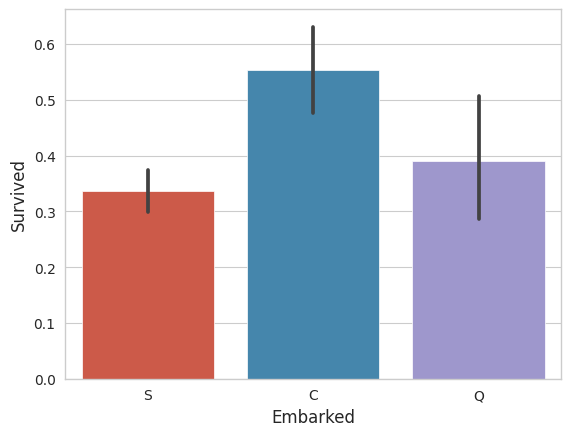

Embarked
C    55.36%
Q    38.96%
S     33.7%
Name: Survived, dtype: object

In [10]:
# Showing average survival rate for each embarkation point

plot_and_percent("Embarked" , "Survived" , df)

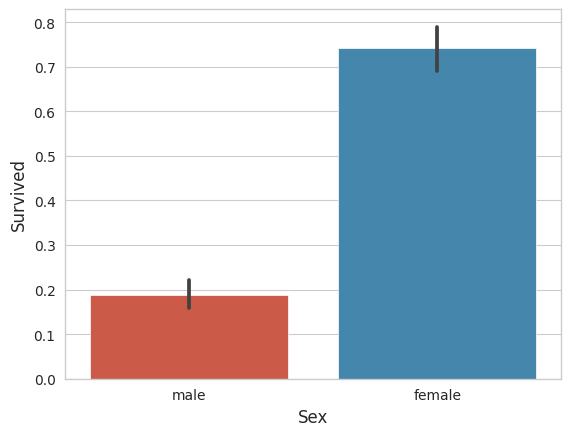

Sex
female     74.2%
male      18.89%
Name: Survived, dtype: object

In [11]:
# Survival percentage by gender

plot_and_percent("Sex" , "Survived" , df)

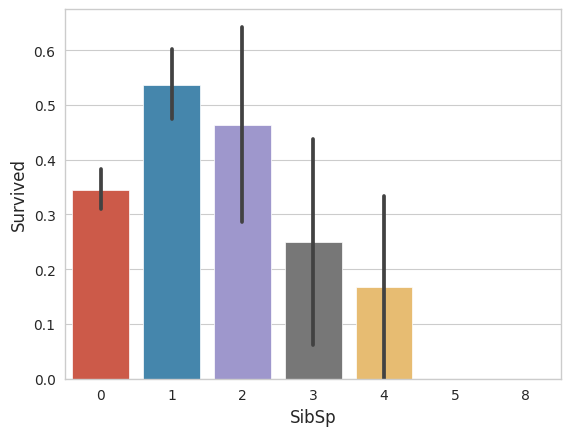

SibSp
1    53.59%
2    46.43%
0    34.54%
3     25.0%
4    16.67%
5      0.0%
8      0.0%
Name: Survived, dtype: object

In [12]:
# Survival percentage by SibSp

plot_and_percent("SibSp" , "Survived" , df)

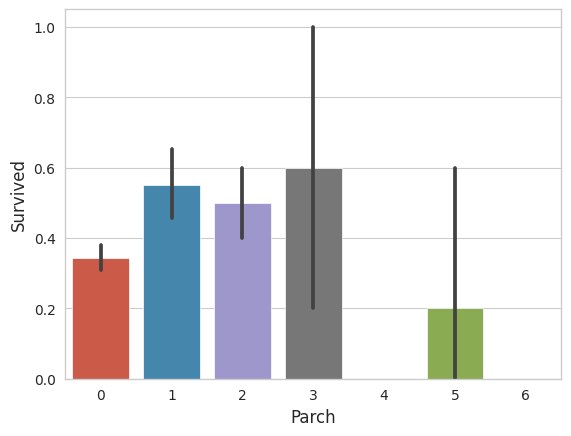

Parch
3     60.0%
1    55.08%
2     50.0%
0    34.37%
5     20.0%
4      0.0%
6      0.0%
Name: Survived, dtype: object

In [13]:
plot_and_percent("Parch" , "Survived" , df)

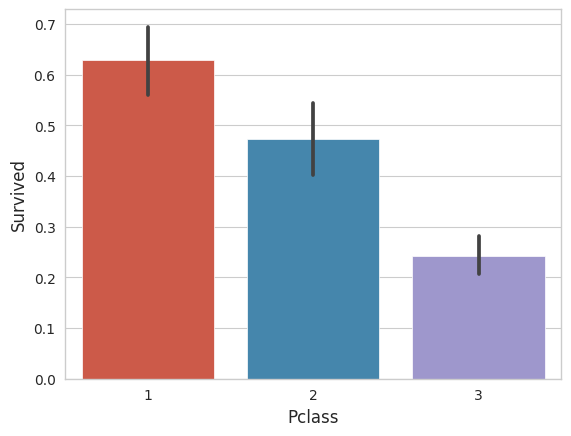

Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object

In [14]:
plot_and_percent("Pclass" , "Survived" , df)

In [15]:
# Add 'HasCabin' feature

df["HasCabin"] = df["Cabin"].notna().astype(int)

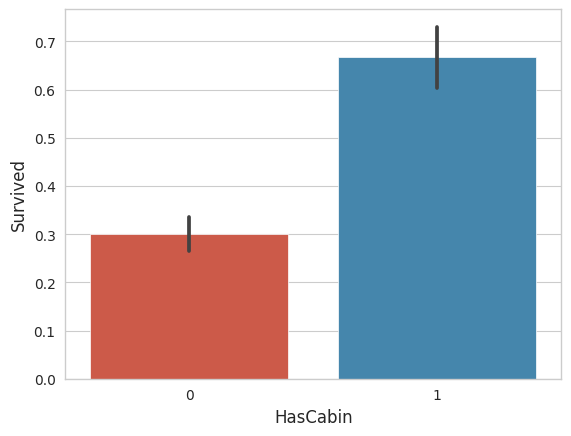

HasCabin
1    66.67%
0    29.99%
Name: Survived, dtype: object

In [16]:
plot_and_percent("HasCabin" , "Survived" , df)

In [17]:
# Remove unnecessary features

df = df.drop(["PassengerId" , "Cabin" , "Ticket"] , axis=1)

In [18]:
df.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
372,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,8.05,S,0
307,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,108.90,C,1


## 🔹 Step 3: Train Test Split

In [19]:
x = df.drop(["Survived"] , axis=1)
y = df["Survived"]

In [20]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

In [21]:
def check_class_balance(y_train, y_test):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Train
    train_counts = pd.Series(y_train).value_counts(normalize=True) * 100
    axes[0].bar(train_counts.index.astype(str), train_counts.values)
    axes[0].set_title("Train Distribution (%)")
    for i, v in enumerate(train_counts.values):
        axes[0].text(i, v + 1, f"{v:.1f}%", ha="center")

    # Test
    test_counts = pd.Series(y_test).value_counts(normalize=True) * 100
    axes[1].bar(test_counts.index.astype(str), test_counts.values, color="orange")
    axes[1].set_title("Test Distribution (%)")
    for i, v in enumerate(test_counts.values):
        axes[1].text(i, v + 1, f"{v:.1f}%", ha="center")

    plt.show()

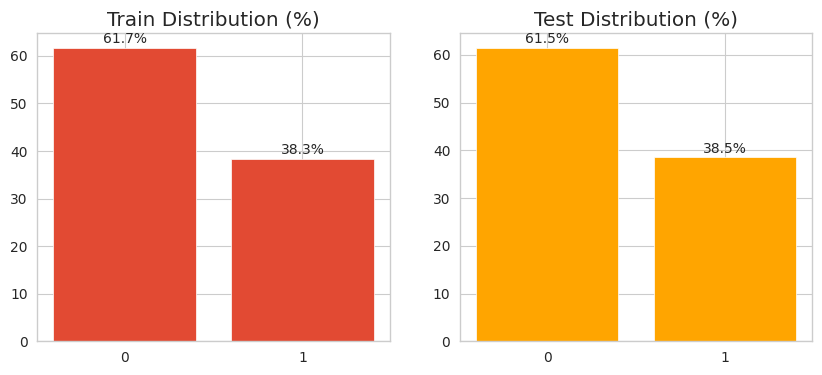

In [22]:
# Show balance

check_class_balance(y_train, y_test)

## 🔹 Step 4: Missing Value Check & Handling

In [23]:
x_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         137
SibSp         0
Parch         0
Fare          0
Embarked      2
HasCabin      0
dtype: int64

In [24]:
from sklearn.impute import KNNImputer , SimpleImputer

def null_imputer(x_train, x_test):
    # Numeric
    x_train_num = x_train.select_dtypes(include=np.number)
    x_test_num = x_test.select_dtypes(include=np.number)

    knn_imputer = KNNImputer(n_neighbors=5)
    x_train_num_imputed = pd.DataFrame(
        knn_imputer.fit_transform(x_train_num),
        columns=x_train_num.columns,
        index=x_train.index
    )
    x_test_num_imputed = pd.DataFrame(
        knn_imputer.transform(x_test_num),
        columns=x_test_num.columns,
        index=x_test.index
    )

    # Categoric
    x_train_cat = x_train.select_dtypes(exclude=np.number)
    x_test_cat = x_test.select_dtypes(exclude=np.number)

    simple_imputer = SimpleImputer(strategy="most_frequent")
    x_train_cat_imputed = pd.DataFrame(
        simple_imputer.fit_transform(x_train_cat),
        columns=x_train_cat.columns,
        index=x_train.index
    )
    x_test_cat_imputed = pd.DataFrame(
        simple_imputer.transform(x_test_cat),
        columns=x_test_cat.columns,
        index=x_test.index
    )

    # Mix
    x_train_imputed = pd.concat([x_train_num_imputed, x_train_cat_imputed], axis=1)
    x_test_imputed = pd.concat([x_test_num_imputed, x_test_cat_imputed], axis=1)

    return x_train_imputed, x_test_imputed


In [25]:
x_train , x_test = null_imputer(x_train , x_test)

In [26]:
x_train.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
HasCabin    0
Name        0
Sex         0
Embarked    0
dtype: int64

## 🔹 Step 5: Outlier Handling

In [27]:
import math

def show_outliers(x_train):
    num_cols = x_train.select_dtypes(include="number").columns
    n = len(num_cols)

    rows = math.ceil(n / 3)
    plt.figure(figsize=(11 , 10))

    for i , col in enumerate(num_cols , 1):
        plt.subplot(rows , 3 , i)
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.rcParams["axes.titlesize"] = 10
        plt.rcParams["ytick.labelsize"] = 10
        plt.rcParams["xtick.labelsize"] = 10


    plt.tight_layout(pad=0.4 , w_pad=0.5 , h_pad=5.0)
    plt.show()

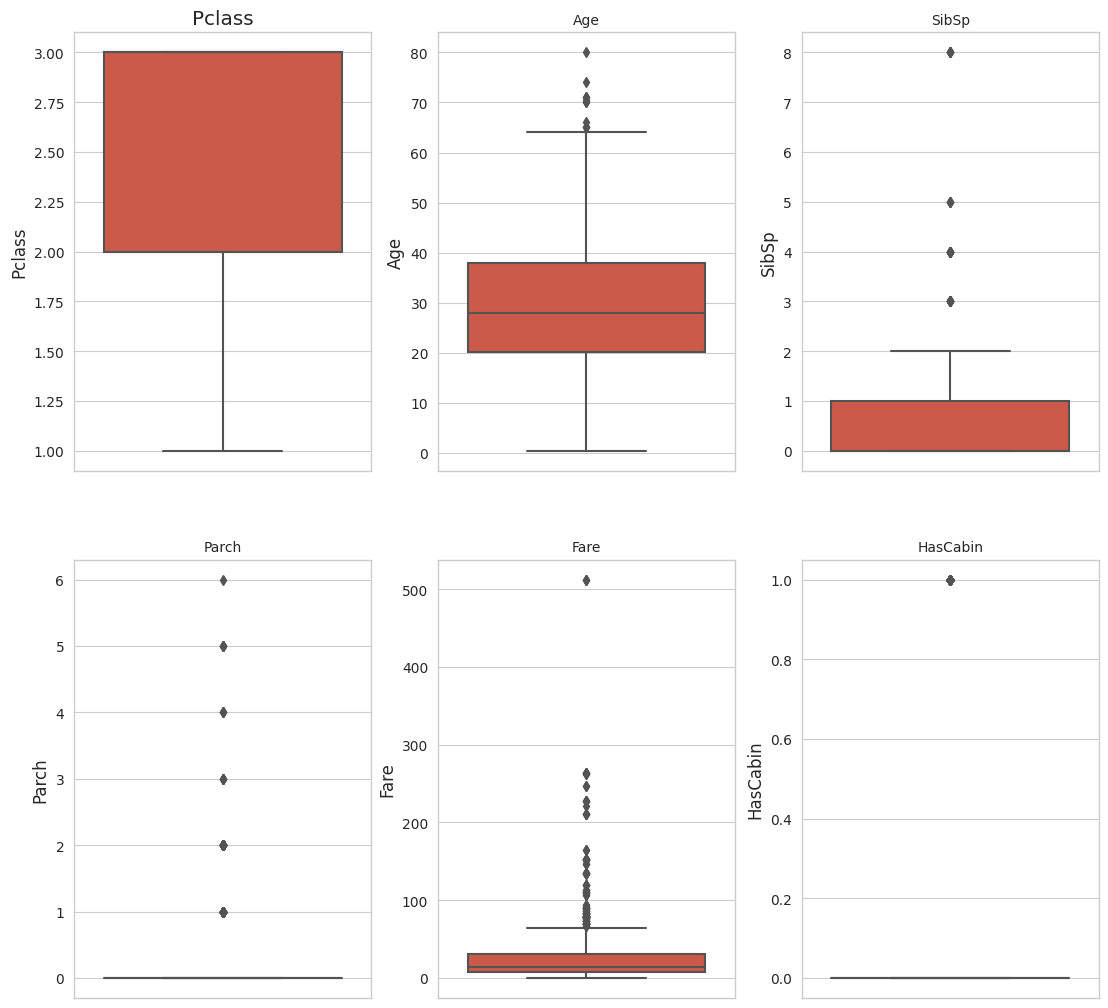

In [28]:
# Show outliers

show_outliers(x_train)

In [29]:
def handle_outliers(x_train , x_test):
    num_cols = x_train.select_dtypes(include="number").columns.to_list()

    q1 = x_train[num_cols].quantile(0.25)
    q3 = x_train[num_cols].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr

    for item in num_cols:
        x_train[item] = x_train[item].clip(lower=lower_bound[item], upper=upper_bound[item])
        x_test[item] = x_test[item].clip(lower=lower_bound[item], upper=upper_bound[item])

    return x_train , x_test

In [30]:
x_train , x_test = handle_outliers(x_train , x_test)

## 🔹 Step 6: Feature Engineering

In [31]:
x_train.sample(3)

,Pclass,Age,SibSp,Parch,Fare,HasCabin,Name,Sex,Embarked
667,3.0,31.2,0.0,0.0,7.7750,0.0,"Rommetvedt, Mr. Knud Paust",male,S
677,3.0,18.0,0.0,0.0,9.8417,0.0,"Turja, Miss. Anna Sofia",female,S
30,1.0,40.0,0.0,0.0,27.7208,0.0,"Uruchurtu, Don. Manuel E",male,C


In [32]:
# Add 'title' feature

for df_set in [x_train , x_test]:
    df_set["Title"] = df_set["Name"].str.extract("([A-Za-z]+)\.", expand=False)
    df_set["Title"] = df_set["Title"].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'] , "Rare")
    df_set["Title"] = df_set["Title"].replace(['Countess','Sir'] , "Royal")
    df_set["Title"] = df_set["Title"].replace(['Mlle','Ms'] , "Miss")
    df_set["Title"] = df_set["Title"].replace(['Mme'] , "Mrs")

    df_set.drop(["Name"] , axis=1 , inplace=True)

In [33]:
# Add 'age group' feature

for df_set in [x_train , x_test]:
    df_set["AgeGroup"] = pd.cut(
        df_set["Age"] ,
        bins=[0 , 5 , 12 , 18 , 24 , 35 , 60 , np.inf],
        labels = ["Baby" , "Child" , "Teenager" , "Young Adult" , "Adult" , "Middle-Aged" , "Senior"]
        )
    df_set.drop(["Age"] , axis=1 , inplace=True)

In [34]:
x_train.sample(3)

,Pclass,SibSp,Parch,Fare,HasCabin,Sex,Embarked,Title,AgeGroup
588,3.0,0.0,0.0,8.050,0.0,male,S,Mr,Young Adult
107,3.0,0.0,0.0,7.775,0.0,male,S,Mr,Adult
718,3.0,0.0,0.0,15.500,0.0,male,Q,Mr,Adult


## 🔹 Step 7: Encoding Categorical Variables

In [35]:
# 'Title' encoding

title_mapping = {
    "Mr": 0,
    "Miss": 1,
    "Mrs": 2,
    "Master": 3,
    "Rare": 4,
    "Royal": 5
}

for df_set in [x_train , x_test]:
    df_set["Title"] = df_set["Title"].map(title_mapping)

In [36]:
x_train.sample(3)

,Pclass,SibSp,Parch,Fare,HasCabin,Sex,Embarked,Title,AgeGroup
526,2.0,0.0,0.0,10.500,0.0,female,S,1,Middle-Aged
167,3.0,1.0,0.0,27.900,0.0,female,S,2,Middle-Aged
436,3.0,2.0,0.0,34.375,0.0,female,S,1,Young Adult


In [37]:
# 'AgeGroup' encoding

age_group_mapping = {
    "Baby": 0,
    "Child": 1,
    "Teenager": 2,
    "Young Adult": 3,
    "Adult": 4,
    "Middle-Aged": 5,
    "Senior": 6
}

for df_set in [x_train , x_test]:
    df_set["AgeGroup"] = df_set["AgeGroup"].map(age_group_mapping)

In [38]:
x_train.sample(3)

,Pclass,SibSp,Parch,Fare,HasCabin,Sex,Embarked,Title,AgeGroup
538,3.0,0.0,0.0,14.5000,0.0,male,S,0,4
652,3.0,0.0,0.0,8.4333,0.0,male,S,0,3
513,1.0,1.0,0.0,59.4000,0.0,female,C,2,5


In [39]:
# 'Embarked' encoding

embarked_mapping = {"S" : 1 , "C" : 2 , "Q" : 3}

for df_set in [x_train , x_test]:
    df_set["Embarked"] = df_set["Embarked"].map(embarked_mapping)

In [40]:
x_train.sample(3)

,Pclass,SibSp,Parch,Fare,HasCabin,Sex,Embarked,Title,AgeGroup
876,3.0,0.0,0.0,9.8458,0.0,male,1,0,3
467,1.0,0.0,0.0,26.5500,0.0,male,1,0,5
306,1.0,0.0,0.0,77.2084,0.0,female,2,1,4


In [41]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_train_test(x_train, x_test):
    x_train_enc = x_train.copy()
    x_test_enc = x_test.copy()

    obj_cols = x_train_enc.select_dtypes(include="object").columns.to_list()

    ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore", dtype=int, drop="first")

    for col in obj_cols:
        # Fit on train
        ohe.fit(x_train_enc[[col]])

        # Transform train
        train_encoded = pd.DataFrame(
            ohe.transform(x_train_enc[[col]]),
            columns=ohe.get_feature_names_out([col]),
            index=x_train_enc.index
        ).astype(int)
        x_train_enc = pd.concat([x_train_enc.drop(col, axis=1), train_encoded], axis=1)

        # Transform test
        test_encoded = pd.DataFrame(
            ohe.transform(x_test_enc[[col]]),
            columns=ohe.get_feature_names_out([col]),
            index=x_test_enc.index
        ).astype(int)
        x_test_enc = pd.concat([x_test_enc.drop(col, axis=1), test_encoded], axis=1)

    return x_train_enc, x_test_enc

In [42]:
x_train , x_test = onehot_encode_train_test(x_train, x_test)

In [43]:
x_train.sample(3)

,Pclass,SibSp,Parch,Fare,HasCabin,Embarked,Title,AgeGroup,Sex_male
487,1.0,0.0,0.0,29.7000,0.0,2,0,5,1
821,3.0,0.0,0.0,8.6625,0.0,1,0,4,1
516,2.0,0.0,0.0,10.5000,0.0,1,2,4,0


## 🔹 Step 8: Correlation Analysis

In [44]:
# corr between features

def high_correlations(df, threshold=0.85, plot_true=True):
    # computing
    c = df.corr(numeric_only=True).round(2)

    # threshold
    high_corr = []
    for i in range(len(c.columns)):
        for j in range(i):
            if np.abs(c.iloc[i, j]) > threshold:
                high_corr.append((c.columns[i], c.columns[j], np.abs(c.iloc[i, j])))

    # plot
    if plot_true:
        mask = c < threshold
        plt.figure(figsize=(15, 7))
        sns.heatmap(c, mask=mask, annot=True, cmap="coolwarm")
        plt.show()


     # result
    if high_corr:
        print("High correlations found (>{}):".format(threshold))
        for pair in high_corr:
            print(pair)
    else:
        print("No correlations above threshold.")

    return high_corr

In [45]:
high_correlations(x_train , 0.85 , False);

No correlations above threshold.


<Axes: >

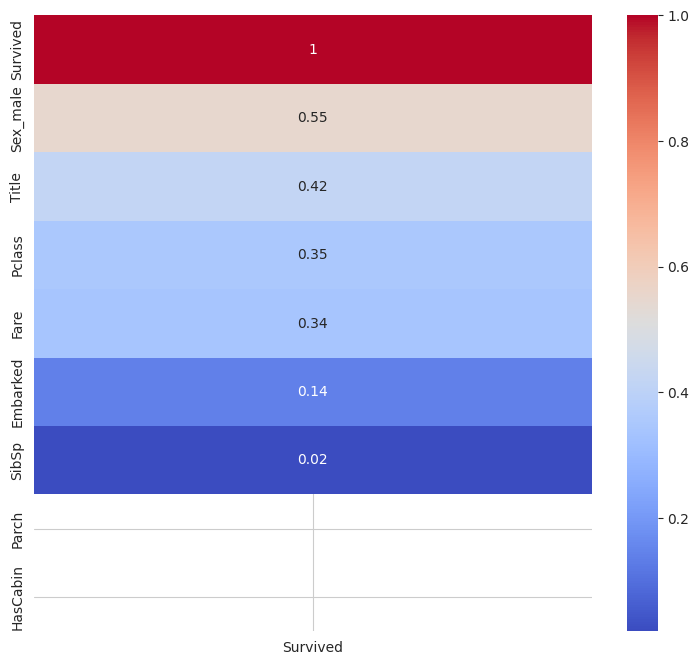

In [46]:
# corr between features & target

plt.figure(figsize=(9,8))

c = pd.concat([x_train , y_train] , axis=1).corr(numeric_only=True)["Survived"].abs().round(2).sort_values(ascending=False)
sns.heatmap(c.to_frame() , annot=True , cmap="coolwarm")

## 🔹 Step 9: Skewness Handling

In [47]:
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def skew_transform_report(df, col_name, plot=True):
    x = df[col_name].dropna()

    # --- metrics ---
    def metrics(vec):
        sk = skew(vec, nan_policy="omit")
        ku = kurtosis(vec, fisher=True, nan_policy="omit")
        jb_stat, jb_p = jarque_bera(vec)
        return sk, ku, round(jb_p , 2)

    # --- transformations ---
    x_log = np.log1p(x)
    x_sqrt = np.sqrt(x)
    x_bc, lam_bc = boxcox(x + 1e-6)
    pt = PowerTransformer(method="yeo-johnson", standardize=False)
    x_yj = pt.fit_transform(x.values.reshape(-1,1)).ravel()

    # --- report ---
    rows = [
        ("Original", *metrics(x)),
        ("Log1p", *metrics(x_log)),
        ("Sqrt", *metrics(x_sqrt)),
        (f"Box-Cox λ={lam_bc:.3f}", *metrics(x_bc)),
        (f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}", *metrics(x_yj))
    ]

    report = pd.DataFrame(rows, columns=["Transform", "Skewness", "Kurtosis", "JB-p"])

    # --- plotting ---
    if plot:
        plt.figure(figsize=(15,4))
        datasets = [x, x_log, x_sqrt, x_bc, x_yj]
        titles = ["Original", "Log1p", "Sqrt", f"Box-Cox λ={lam_bc:.3f}", f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}"]
        for i, data in enumerate(datasets):
            plt.subplot(1, 5, i+1)
            sns.histplot(data, kde=True, bins=20, color="skyblue")
            plt.title(titles[i])
        plt.tight_layout()
        plt.show()

    return report

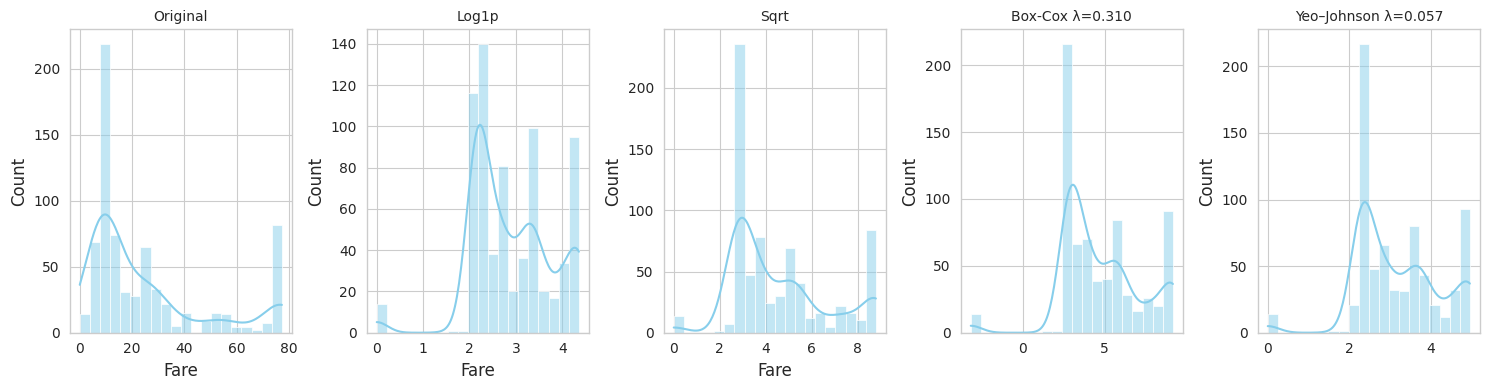

,Transform,Skewness,Kurtosis,JB-p
0,Original,1.267306,0.252287,0.00
1,Log1p,-0.178495,0.642898,0.00
2,Sqrt,0.716247,-0.368244,0.00
3,Box-Cox λ=0.310,0.014717,0.732948,0.00
4,Yeo–Johnson λ=0.057,0.004826,0.196671,0.56


In [48]:
skew_transform_report(pd.concat([x_train , y_train] , axis=1) , "Fare" , plot=True)

In [49]:
transformer = PowerTransformer(method="yeo-johnson" , standardize=False)
x_train["Fare"] = transformer.fit_transform(x_train[["Fare"]])
x_test["Fare"] = transformer.transform(x_test[["Fare"]])

## 🔹 Step 10: Evaluation of model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures


pipe = Pipeline([
    ("poly" , PolynomialFeatures(degree=2)),
    ("scaler" , MinMaxScaler(feature_range=(0,1))),
    ("model" , LogisticRegression(max_iter=5000 , class_weight="balanced"))
])

pipe.fit(x_train , y_train)

y_pred = pipe.predict(x_test)

score = f1_score(y_test , y_pred , average="weighted")
print(f"F1 Score: {score:.4f}")

F1 Score: 0.8314
